In [15]:
import datetime as dt
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
from arch import arch_model
import cufflinks as cf
import statsmodels.tsa.api as smt
cf.go_offline()
%matplotlib inline

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2015,1,1)
data = web.DataReader("AAPL",'yahoo',start,end)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.782711
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.829010
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.402260
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.353460
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.528664


In [4]:
data['mvg_27'] = data['Close'].rolling(27).mean()  
data['mvg_7'] = data['Close'].rolling(7).mean()

Text(0.5, 1.0, 'AAPL Close Price')

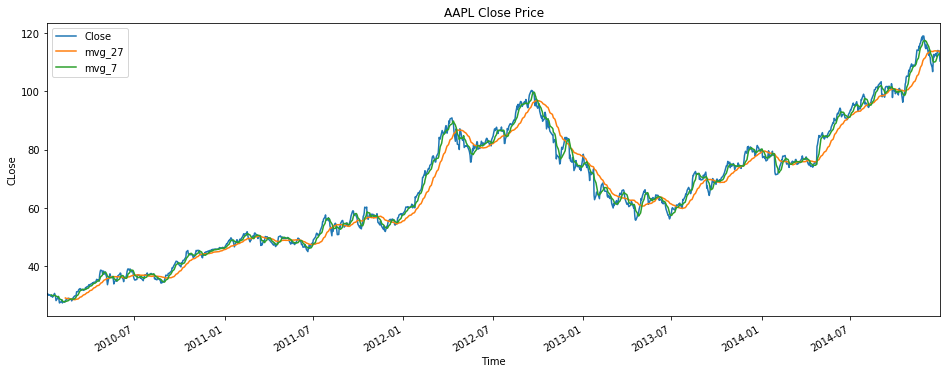

In [5]:
data[['Close','mvg_27','mvg_7']].plot(figsize=(16,6))
plt.ylabel('CLose')
plt.xlabel('Time')
plt.title('AAPL Close Price')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



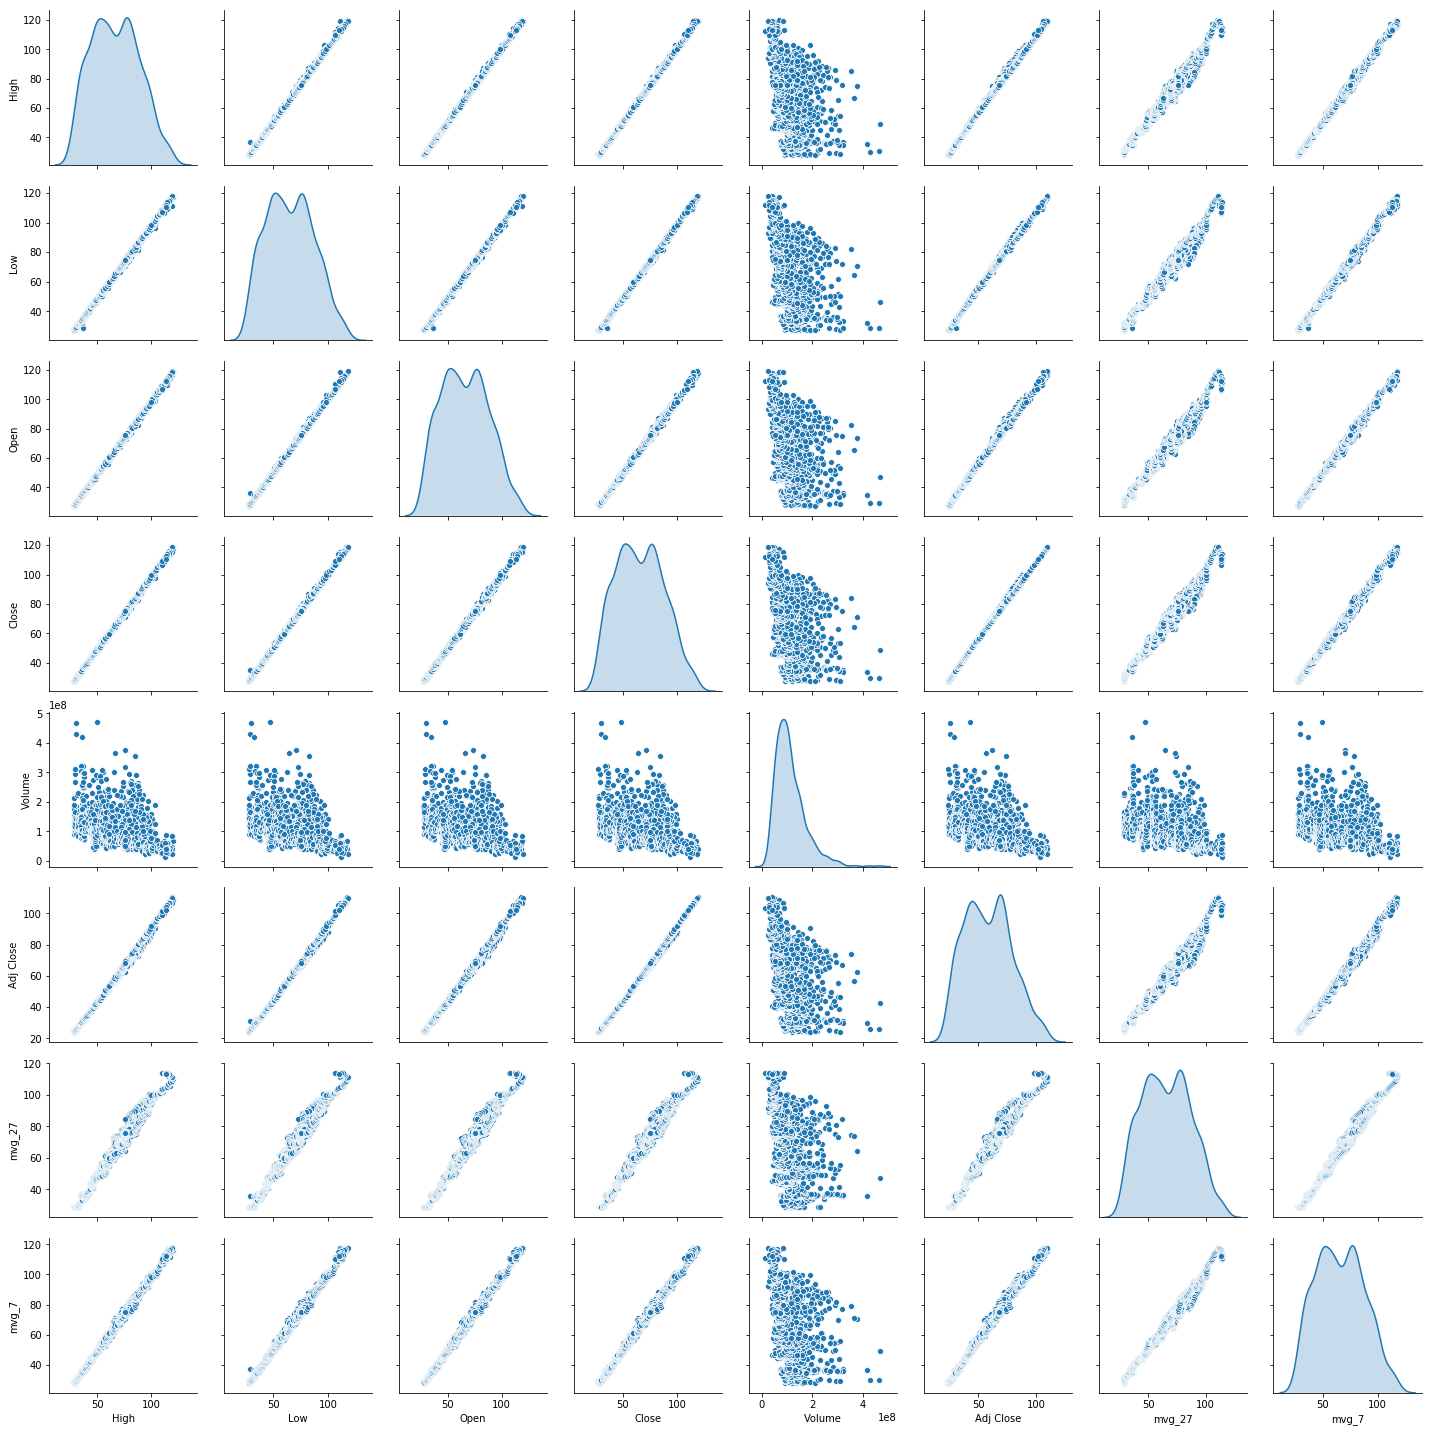

In [6]:
sns.pairplot(data,diag_kind="kde")

(array([192., 483., 322., 150.,  61.,  28.,  15.,   3.,   1.,   3.]),
 array([1.4479600e+07, 6.0056590e+07, 1.0563358e+08, 1.5121057e+08,
        1.9678756e+08, 2.4236455e+08, 2.8794154e+08, 3.3351853e+08,
        3.7909552e+08, 4.2467251e+08, 4.7024950e+08]),
 <a list of 10 Patch objects>)

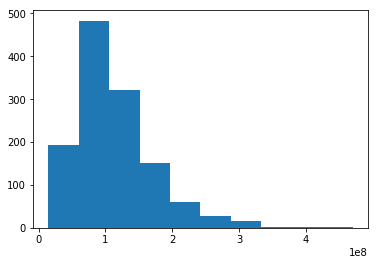

In [7]:
plt.hist(data['Volume'])

(array([ 29., 163., 238., 245., 188., 134.,  91.,  59.,  37.,  24.,  18.,
         10.,  11.,   4.,   1.,   2.,   0.,   1.,   1.,   2.]),
 array([1.44796000e+07, 3.72680950e+07, 6.00565900e+07, 8.28450850e+07,
        1.05633580e+08, 1.28422075e+08, 1.51210570e+08, 1.73999065e+08,
        1.96787560e+08, 2.19576055e+08, 2.42364550e+08, 2.65153045e+08,
        2.87941540e+08, 3.10730035e+08, 3.33518530e+08, 3.56307025e+08,
        3.79095520e+08, 4.01884015e+08, 4.24672510e+08, 4.47461005e+08,
        4.70249500e+08]),
 <a list of 20 Patch objects>)

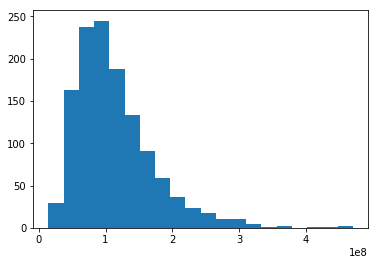

In [8]:
plt.hist(data['Volume'], bins=20)

Text(0.5, 1.0, 'ok')

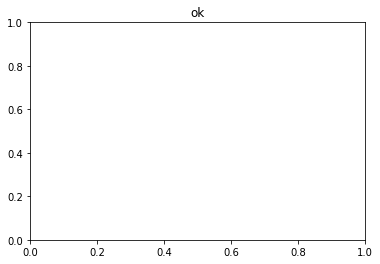

In [9]:
data[['Close','mvg_27','mvg_7']].iplot()
plt.title('ok')

In [10]:
returns = 100 * data['Close'].pct_change().dropna()
am = arch_model(returns)

In [11]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2405.862935557536
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2405.014699309758
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2404.626889085777
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2404.321657835105
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2404.3154985367028
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2404.05059265095
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2404.043166535297
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2404.041137734286
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2404.0409728922627
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2404.040939094599
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2404.0409390937166
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


In [12]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2404.04
Distribution:                  Normal   AIC:                           4816.08
Method:            Maximum Likelihood   BIC:                           4836.63
                                        No. Observations:                 1257
Date:                Thu, Jul 11 2019   Df Residuals:                     1253
Time:                        12:02:12   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1812  5.023e-02      3.607  3.103e-04 [8.271e-0

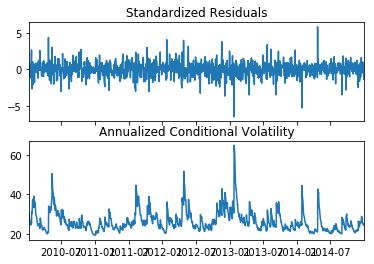

In [13]:
fig = res.plot(annualize='D')

In [14]:
data['Close'] = data['Close']
data['Close'] = data['Close'].pct_change()

In [20]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

NameError: name 'sm' is not defined

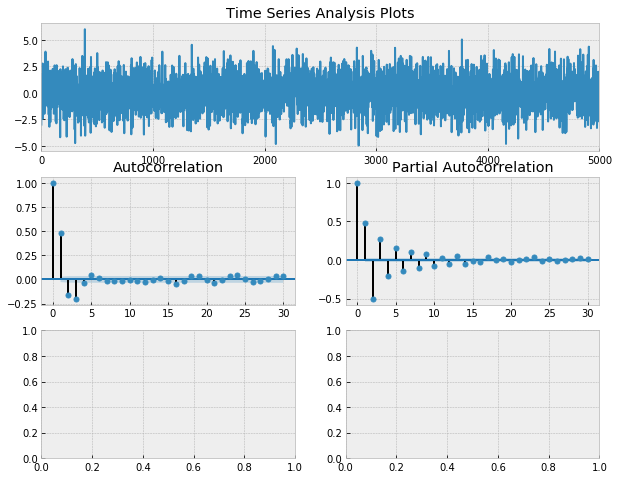

In [21]:
# Simulate an ARMA(2, 2) model with alphas=[0.5,-0.25] and betas=[0.5,-0.3]
max_lag = 30

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag)